In [16]:
from surfacecode.helpers import parse_csv
import numpy as np

In [79]:
FILENAME = "/Users/hiro/Downloads/cpx1nyzsp83g008b0fj0_histogram (1).csv"
LENGTH = 112

In [80]:
shots = parse_csv(FILENAME, LENGTH)

0000000100000000000000000100000000000010000010100010001001000000000000000000000000000000000000000000000000000000
0001000000000000000100000001000000000010001010000000001000000000000000000000000000000000000000000000000000000000
0000000100000000000000010101001010000000101010000000101000010000000000000000000000000000000000000000000000000000
0001000000000000010000000001000010100000100000100010100000000000000000000000000000000000000000000000000000000000
0000000000010000000000000100000000100010001010000000101001010000000000000000000000000000000000000000000000000000
0001000000000000010100000100001010000010001010100010101000000000000000000000000000000000000000000000000000000000
0001000000000000010100000101001010000010101010000010101000000000000000000000000000000000000000000000000000000000
0001000000000000010100010001001010000010101000000000101000000000000000000000000000000000000000000000000000000000
000100000000000001010001010100001000000010101010001010100000000000000000000000000000000000000000

In [77]:
m = 0
for shot in shots['keys']:
    m = max(m, len(shot))

In [78]:
m

112

In [7]:
shots['keys'][0]

'1000000000000000000000000000000010100010000000000010000000000000000000000000000000000'

In [7]:
shots['keys'][0][2:2+27]

'000000000000000000000000000'

In [8]:
shots['keys'][0][2+27:2+27 + 27]

'000101000100000000000100000'

In [10]:
shots['keys'][0][2+27+27:2+27+27+27]

'000000000000000000000000000'

In [14]:
print(shots['keys'][4][:2])
print(shots['keys'][4][2:29])
print(shots['keys'][4][29:56])


10
000001000001000001000001010
010101000101000101000101000


In [59]:
def cycles(key: str, num_stabilizers: int, width: int, height: int):
    cycles = key.split(" ")[1:]
    sep_cycles = []
    for cycle in cycles:
        cycle = cycle[:width * height]
        j = 1
        z_measures = []
        x_measures = []
        for i, measure in enumerate(cycle):
            if i >= width * j:
                j += 1
            if i % 2 == 1:
                if j % 2 == 1:
                    z_measures.append(int(measure))
                else:
                    x_measures.append(int(measure))
                    
        sep_cycle = np.concatenate([np.array(z_measures), np.array(x_measures)])
        sep_cycle = np.array(sep_cycle).reshape(1, -1)
        sep_cycles.append(sep_cycle)

    sep_cycles = np.concatenate(sep_cycles)
    return sep_cycles

In [97]:
result = {"00": 0, "11": 0, "01": 0, "10": 0}

for shot, count in zip(shots['keys'], shots['counts']):
    #s = shot[:2] + " " + shot[2:29]
    #seps = cycles(s, 13, 3, 9)
    a1, a2 = int(shot[0]), int(shot[1])
    b1 ,b2 = int(shot[84]), int(shot[85])

    x1 = a1 ^ a2
    x2 = b1 ^ b2

    result[str(x1) + str(x2)] += count

In [98]:
result

{'00': 527, '11': 0, '01': 0, '10': 473}

In [99]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Counts')

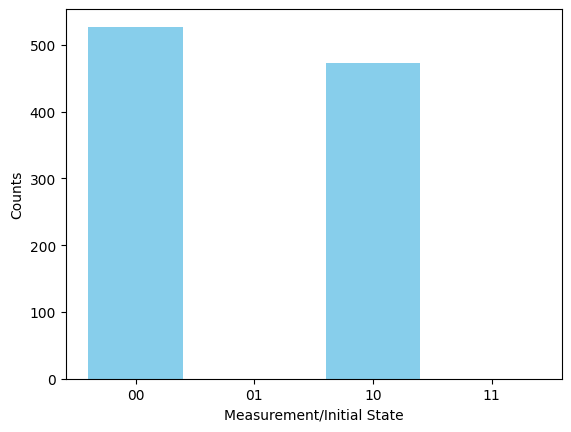

In [100]:
keys = ['00', '01', '10', '11']
counts = [result['00'], result['01'], result['10'], result['11']]

plt.bar(keys, counts, color='skyblue')
plt.xlabel('Measurement/Initial State')
plt.ylabel('Counts')

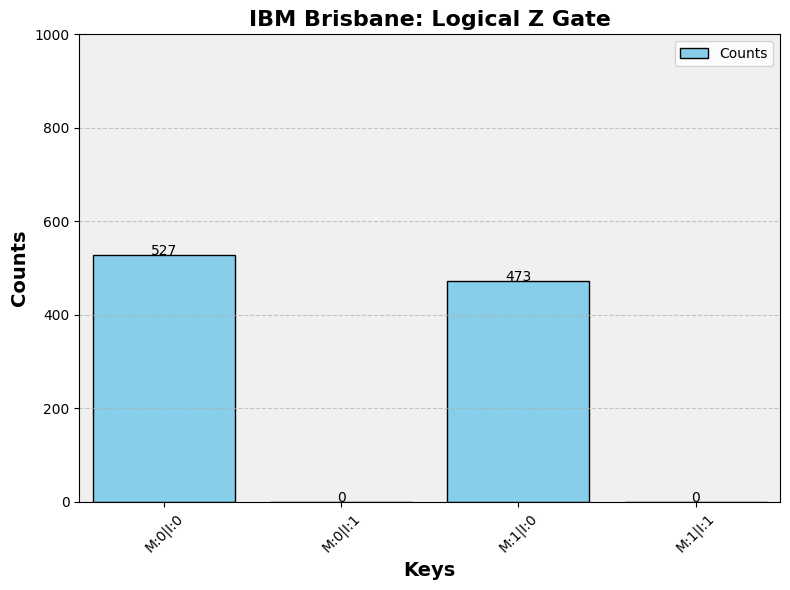

In [101]:
import matplotlib.pyplot as plt

# Data
keys = ['M:0|I:0', 'M:0|I:1', 'M:1|I:0', 'M:1|I:1']
counts = [result['00'], result['01'], result['10'], result['11']]

# Plotting the histogram
plt.figure(figsize=(8, 6))  # Adjusting figure size
plt.bar(keys, counts, color='skyblue', edgecolor='black')  # Adding edgecolor

# Adding data labels
for i in range(len(keys)):
    plt.text(i, counts[i] + 0.1, str(counts[i]), ha='center')

# Adding labels and title with custom font properties
plt.xlabel('Keys', fontsize=14, fontweight='bold')
plt.ylabel('Counts', fontsize=14, fontweight='bold')
plt.title('IBM Brisbane: Logical Z Gate', fontsize=16, fontweight='bold')
plt.ylim(0, 1000)

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a legend
plt.legend(['Counts'], loc='upper right')

# Adding background color
plt.gca().set_facecolor('#f0f0f0')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adjusting margins
plt.margins(0.02)

# Displaying the plot
plt.tight_layout()
plt.show()


In [72]:
len('1000000000000000100000001000000000010001010000000001000000000000000000000000000000000000000000000000000000000')

109